# Support Vector Machines
See
- https://github.com/ageron/handson-ml/blob/master/05_support_vector_machines.ipynb and
- http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html (first picture)

for details and code.<br><br>
A Support Vector Machine (SVM) can be used for regression, linear or nonlinear classification, and even for outier detection. SVMs are particularly useful for classification of complex but small- or medium-sized datasets.
## Linear SVM Classification & Soft Margin Classification
pages 145 and 146<br>
The fundamenteal idea behind SVMs is well explained by the pictures in Figure 5-1 of the book. In short, they try to establish a hyperplane that separates the instances of two classes. Several hyperplane orientations might be possible but the algorithm tries to maximise the margin to the closest instances. So only those instances of the two classes that are nearest to the hyperplane determine its orientation and the margin (*large margin classification*). These instances are called the *support vectors*. In this form, the hyperplane might change abruptly if one new instance is taken into account that lies closer to the hyperplane. While this might be good on the training set, it does not necessarily generalize well - a typical sign to overfitting. Moreover, such a *hard margin* classification  is only possible if the dataset is *linearly separable*. A compromise is to allow a few margin violations while keeping the margin large. This is called *soft margin* classification. If the dataset is not linearly separable, a hyperplane that separates the two classes does not exist. In that case, soft margin clssification is necessary. In addition, using soft margins reduces the probability for overfitting.<br>
In Scikit-Learn, the tradeoff between large margins and small number of violations is determined by the hyperparameter $C$: small $C$ leads to large margins and more margin violations (not necessarily to misclassification as a margin-violating instance might still be on the "right side of the road") while large $C$ leads to small margins and less margin violations.<br><br>
**Tip or suggestion**<br>
If your SVM model is overfitting, you can try regularizing it by reducing $C$.<br><br>
**Warning / caution**<br>
SVMs are sensitive to the feature scales, as you can see in Figure 5-2: on the left plot, the vertical scale is much larger than the horizontal scale, so the widest possible street is close to horizontal. After feature scaling (e.g., using Scikit-Learn's *StandardScaler*), the decision boundary looks much better (on the right plot).<br><br>
Now, let's use Scikit-Learn to train an SVM that detects Iris-Virginica flowers in the iris dataset (see Chapter 4). Here, we use $C=0.1$ and the *hinge loss* function (see the section about *Online SVMs* further below).

In [21]:
# some imports
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC            # use a linear SVM classifier
# features and labels
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]                  # petal length and petal width
y = (iris["target"] == 2).astype(np.float64) # Iris-Virginica
# establish model, train it, and make a prediction
svm_clf = Pipeline((
        ("scaler", StandardScaler()),
        ("lineaer_svc", LinearSVC(C=1, loss="hinge")),
    ))
print(svm_clf.fit(X, y))
print(svm_clf.predict([[5.5, 1.7]]))         # this instance is classified as an Iris-Virginica

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lineaer_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)
[1.]


Good care ought to be taken as to exactly what kind of SVM is used, see page 148.<br><br>
**General note**<br>
Unlike Logistic Regression classifiers, SVM classifiers do not output probabilities for each class.<br><br>
**Tip or suggestion**<br>
The *LinearSVC* class regularizes the bias term, so you should center the training set first by subtracting its mean. This is automatic if you scale the data using the *StandardScaler*. Moreover, make sure you set the *loss* hyperparameter to "hinge", as it is not the default value. Finally, for better performance you should set the *dual* hyperparamter to *False*, unless there are more features than training instances. Duality will be discussed only shortly further below (but more detailed in the book).
## Nonlinear SVM Classification
page 149<br>
Many datasets that are not linearly separable can be made linearly separable by adding more features, e.g., polyinomial features (as in Chapter 4). For example, consider a dataset that has only one scalar feature $x\in[-4,+4]$ per instance, where instance $i$ belongs to class 0 if $|x_i|<2$ and to class 1 if $|x_i|\geq2$. Using a linear SVM will not do the job: the dataset is not linearly separable at all! But augmenting the data by adding a second feature, $y_i=x_i^2\in[0,16]$ will make it separable. One possible hyperplance that separates the classes is given by $y_{hyper}=4$.<br>
Let's implement polynomial features up to degree 3 for the moons dataset (see Scikit-Learn link above) by using Scikit-Learn with a pipeline containing a PolynomialFeatures transformer (see "Polynomial Regression" on page 121 / Chapter 4).

In [22]:
# more imports
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
# remaining imports from Github
import matplotlib
import matplotlib.pyplot as plt       
X, y = make_moons(n_samples=100, noise=0.15, random_state=42) # from Github link above
# preprocess and train
polynomial_svm_clf = Pipeline((
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge"))
    ))
polynomial_svm_clf.fit(X, y)

/home/matthias/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

To plot the dataset and the predictions, we include some code from the Github link above.

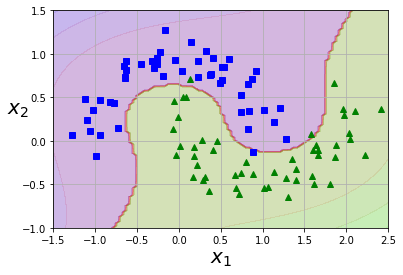

In [23]:
# define function to plot the dataset
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
# define function to plot the predictions
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
# make the plots and show them
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

This SVM algorithm separates the two classes rather well.
### Polynomial Kernel
page 150<br>
Using polynomial features is easy to implement and can yield very good results - not only for SVMs (see, e.g. Chapter 4). However, a low polynomial degree might not suffice for a complex dataset and a high polynomial degree leads to a huge number of features, thus slowing down the model.<br>
For SVMs, one can use the incredibly useful *kernel trick*, which is only shortly discussed further below (but more detailed in the book). In short, it yields results as if there were many polynomial features without actually adding them. So there is no combinatorial explosion of the number of features. The kernel trick can be implemented with Scikit-Learn's *SVC* class. Let's test it with the moons dataset!

In [24]:
# from book
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline((
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ))
print(poly_kernel_svm_clf.fit(X, y))
# from Github
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
print(poly100_kernel_svm_clf.fit(X, y))

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, cache_size=200, class_weight=None, coef0=1,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, cache_size=200, class_weight=None, coef0=100,
                     decision_function_shape='ovr', degree=10,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
     

Display the data and the trained models. The hyperparameter $d$ (3 or 10) denotes the degree of the polynomial, $r$ determines how much the model is influenced by high-degree polynomials vs. low-degree polynomials, and $C$ regulates the trade-off between margin size and few margin violations (as mentioned above). When the model is overfitting, reducing $d$ and/or $C$ is likely to improve the performance.

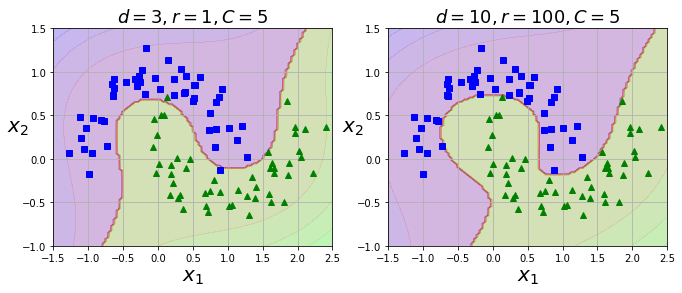

In [25]:
# from Github but without saving the plots
plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)
plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.show()

**Tip or suggestion**<br>
A common apporach to find the right hyperparameter values is to use grid search (see Chapter 2). It is often faster to first do a very coarse grid search, then a finer grid search around the best values found. Having a good sense of what each hyperparameter actually does can also help you search in the right part of the hyperparameter space.
### Adding Similarity Features
page 151<br>
At the beginning of our discussion of nonlinear SVM classification, we discussed a nonlinear (meaning here: not linearly separable) dataset with only one instance per feature. In order to find a class-separating hyperplane, we introduced an additional feature, namely the square of each instance's default feature. Another method is to introduce a similarity function,
$$\phi_{\gamma}(x,l)=exp(-\gamma|x-l|^2)\,,$$
the Gaussian *Radial Basis Function* (RBF). It assigns each instance an additional feature: it's similarity $\phi_{\gamma}(x,l)$ to the *landmark* $l$. Here, $\gamma>0$ is a hyperparameter, $l$ is one of possibly many landmarks, and $x$ is the original feature, which is usually disregarded after computing the similarities to all landmarks. The selection of the landmarks might be intuitive, depending on the specific problem. Otherwise, introducing a landmark for all instances' original features will create $m$ features for each instance (there are $m$ instances). This routine is simple and gives a high-dimensional feature vector, thus increasing the chance to find a useful hyperplane.
### Gaussian RBF Kernel
page 152<br>
Just like polynomial features, adding similarity features can be useful for any machine learning algorithm. But it can lead to large datasets that slow down training. But for SVMs, the kernel trick that also applied to polynomial features does the trick again: one can obtain results as if features had been added without actually adding them. Let's try the Gaussian RBF kernel using the SVC class!

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)


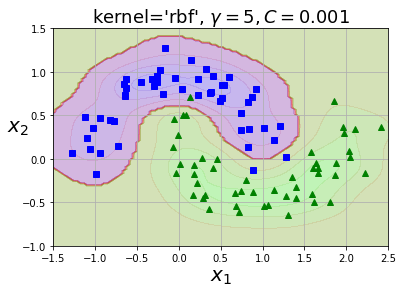

In [26]:
rbf_kernel_svm_clf = Pipeline((
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ))
print(rbf_kernel_svm_clf.fit(X, y))
plot_predictions(rbf_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"kernel='rbf', $\gamma=5, C=0.001$", fontsize=18)
plt.show()

Increasing $\gamma$ reduces the range of influence of each landmark, such that each landmark rather dominates the influence in its local area. As larger $\gamma$ puts more influence of individual instances, it can lead to overfitting. If the model is overfitting, reducing $\gamma$ or $C$ (discussed above) is a good strategy.<br>
There are a number of additional kernels for SVMs, some specialized for specific data types, e.g., DNA sequences.<br><br>
**Tip or suggestion**<br>
With so many kernels to choose from, how can you decide which one to use? As a rule of thumb, you should always try the linear kernel first (remember that *LinearSVC* is much faster than *SVC(kernel="linear")*), especially if the training set is very large or if it has plenty of features. If the training set is not too large, you should try the Gaussian RBF kernel as well; it works well in most cases. Then if you have spare time and computing power, you can also experiment with a few other kernels using cross-validation and grid search, especially if there are kernels specialized for your training set's data structure.
## Computational Complexity
page 153<br>
Here, we reproduce a table from the book showing a comparison of Scikit-Learn classes for SVM classification.

|Class|Time complexity|Out-of-core support|Scaling required|Kernel trick|
|:-|-|-|-|-|
|LinearSVC|$\mathcal{O}(m\times n)$|No|Yes|No|
|SGDClassifier|$\mathcal{O}(m\times n)$|Yes|Yes|No|
|SVC|$\mathcal{O}(m^2\times n)$ to $\mathcal{O}(m^3\times n)$|No|Yes|Yes|

## SVM Regression
page 153<br>
SVMs are very versatile: they can also be used for linear and nonlinear regression tasks. This is achieved by posing the opposite task: instead of finding a large road ("road"=hyperplane with margins) with few instances on it, as for classification, regression is achieved by finding a small road with many instances on it. Let's test this with Scikit-Learn's LinearSVR class, where the width of the street is controlled by the hyperparameter $\epsilon$.

In [27]:
# generate some random linear data
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()
# train an algorithm with \epsilon=1.5
from sklearn.svm import LinearSVR
svm_reg1 = LinearSVR(epsilon=1.5)
print(svm_reg1.fit(X, y))
# train an algorithm with \epsilon=0.5
from sklearn.svm import LinearSVR
svm_reg2 = LinearSVR(epsilon=0.5)
print(svm_reg2.fit(X, y))

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)
LinearSVR(C=1.0, dual=True, epsilon=0.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)


To display the results, we take code from the Github link above.

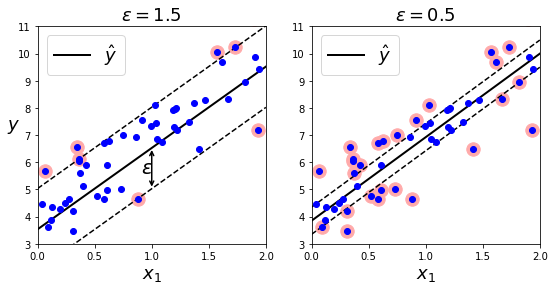

In [28]:
def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)
svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)
eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)
plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.subplot(122)
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
plt.show()

Adding more instances within the margin does not affect the model's predictions; thus, the model is said to be *$\epsilon$-insensitive*. A kernelized SVM model can be used to tackle nonlinear data. Here, we use a random quadratic dataset. All terms but the bias term $\theta_0$ are regularized by the hyperparameter $C$ (the smaller the more regularization). Again, the width is determined by the hyperparameter $\epsilon$.

/home/matthias/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/matthias/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1,
    gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)
SVR(C=0.01, cache_size=200, coef0=0.0, degree=2, epsilon=0.1,
    gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)


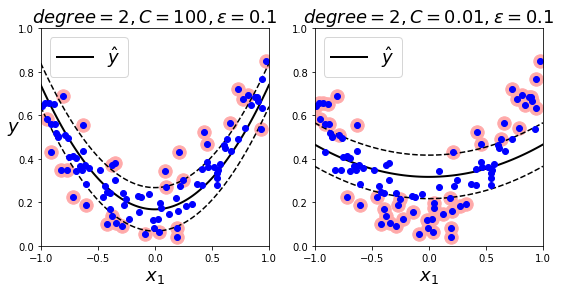

In [29]:
# generate random quadratic data
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()
# train an algorithm with C=100
from sklearn.svm import SVR
svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
print(svm_poly_reg1.fit(X, y))
# train an algorithm with C=0.01
from sklearn.svm import SVR
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1)
print(svm_poly_reg2.fit(X, y))
# plotting results using code from Github
plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree,
                                                     svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.subplot(122)
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree,
                                                     svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
plt.show()

The SVR class is the regression equivalent of the SVC classifier class. The same applies for LinearSVR and LinearSVC classes. The above table showing the computational complexities of classification algorithms also applies for the equivalent regression algorithms (the complexities are the same).<br><br>
**General note**<br>
SVMs can also be used for outlier detection; see Scikit-Learn's documentation for more details.
## Under the Hood
page 156<br>
When dealing with SVMs, it is common to call the bias term $b$ and the vector containing the feature weights $w$. It is usually not necessary to handcraft a constant unit feature for the bias term.
### Decision Function and Predictions
page 156<br>
An SVM classifier predicts the postive ($y=1$) and negative ($y=0$) classes according to
$$y=\left\{\begin{array}0\text{0 if $w^T\cdot x+b<0$},\\\text{1 if $w^T\cdot x+b\geq0$}.\end{array}\right.$$
### Training Objective
page 157<br>
In order to make the "street" as wide as possible, the slope $|w|$ needs to be small (see illustrations on pages 157 and 158). At the same time, *hard margin* classification requires that no instance violates the margin: $t^{(i)}(w^T\cdot x^{(i)}+b)\geq1$ for instance $i$ and with $t^{(i)}=2y^{(i)}-1$. *Soft margins* can be handled with *slack variables* $\zeta^{(i)}\geq0$ for each instance. They represent the margin violation of instance $i$. Then, the classification objective is to minimize
$$\frac{1}{2}w^T\cdot w+C\sum_{i=1}^m\zeta^{i)}$$
by adjusting $w,\,b,\,\zeta$ while conforming
$$t^{(i)}\left(w^T\cdot x^{(i)}+b\right)\geq1-\zeta^{(i)}\quad\text{and}\quad\zeta^{(i)}\geq0\,.$$
So increasing $C$ will lead to smaller and/or less margin violations, i.e., the road will be narrower. This can lead to overfitting.
<br><br>
**General note**<br>
We are minimizing $w^T\cdot w/2$, which is equal to $|w|^2/2$, rather than minimizing $|w|$. This is because it will give the same result (since the values of $w$ and $b$ that minimize a value also minimize half of its square), but $|w|^2/2$ has a nice and simple derivative (it is just $w$) while $|w|$ is not differentiable at $w=0$. Optimization algorithms work much better on  differentiable functions.
### Quadratic Programming, The Dual Problem, and Kernelized SVM
pages 159, 160, and 161<br>
The above training objective is a known problem in *Quadratic Programming* (QP) and can be handled efficiently with several off-the-shelf solvers. For the SVM training objective, the *primal* QP problem is closely related to its *dual* problem. The solution of the dual problem is usually very helpful to the solution of the primal problem. Moreover, the dual problem allows the use of kernel tricks. This allows one to consider, e.g., polynomial features without actually having to add them to the data. Common kernels are as follows:
$$\begin{array}0
\text{Linear:}&K(a,b)=a^T\cdot b\,,\\
\text{Polynomial:}&K(a,b)=(\gamma a^T\cdot b+r)^d\,,\\
\text{Gaussian RBF:}&K(a,b)=exp(-\gamma|a-b|^2)\,,\\
\text{Sigmoid:}&K(a,b)=tanh(\gamma a^T\cdot b+r)\,.
\end{array}$$
In machine learning, a *kernel* is a function capable of computing the dot product $\phi(a)^T\cdot\phi(b)$ based only on the original vectors $a$ and $b$, without having to compute (or even to know about) the transformation $\phi$. *Mercer's Theorem* also deserves a mention in this context.<br><br>
**Mercer's Theorem**<br>
According to *Mercer's theorem*, if a function $K(a, b)$ respects a few mathematical conditions called *Mercer's conditions* ($K$ must be continuous, symmetric in its arguments so $K(a,b)=K(b,a)$, etc.), then there exists a function $\phi$ that maps $a$ and $b$ into another space (possibly with much higher dimensions) such that $K(a,b)=\phi(a)^T\cdot\phi(b)$. So you can use $K$ as a kernel since you know $\phi$ exists, even if you don't know what $\phi$ is. In the case of the Gaussian RBF kernel, it can be shown that $\phi$ actually maps each training instance to an infinite-dimensional space, so it's a good thing you don't need to actually perform the mapping!<br>
Note that some frequently used kernels (such as the Sigmoid kernel) don't respect all of Mercer's conditions, yet they generally work well in practice.

The connection between primal and dual problems is shown in Appendix C of the book.
### Online SVMs
page 164<br>
Online learning means incremental learning, typically as new instances arrive. For linear systems, this can be done by minimizing the *linear SVM classifier cost function*,
$$J(w,b)=w^T\cdot w/2+C\sum_{i=1}^mmax(0,1-t^{(i)}(w^T\cdot x^{(i)}+b))\,.$$
It is almost identical to the cost function further above but now, the margin violations are not independent parameters that can be tweaked for minimization. Instead, the margin violations are now directly related to $w$ and $b$. Importantly, this does not require any retraining if a new instance lies off the road - which will usually be the case. Further options for online SVMs are discussed in the book. Finally, a note on *hinge loss*, which is used in the above cost function!<br><br>
**Hinge Loss**<br>
The function $max(0,1-t)$ is called the *hinge loss* function (represented below [only in the book]). It is equal to $0$ when $t\geq1$. Its derivative (slope) is equal to $-1$ if $t<1$ and $0$ if $t>1$. It is not differentiable at $t=1$, but just like for Lasso Regression (see "Lasso Regression" on page 130) you can still use Gradient Descent using any *subderivative* at $t=1$ (i.e., any value between $-1$ and $0$).
## Extra Material
see Github link above
### Training time
We want to investigate how the training time goes up as we reduce the tolerate for stopping.<br>
See http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html for the Scikit-Learn documentation.

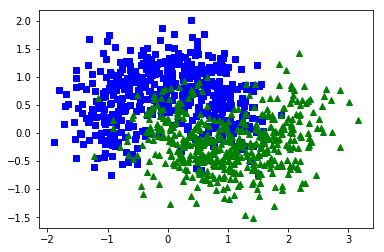

In [30]:
X, y = make_moons(n_samples=1000, noise=0.4, random_state=42) # create some moons data
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")                  # plot blue squares for class 0
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")                  # plot red triangles for class 1

Now, we plot the training time vs. the tolerance. As expected, the training time increases for smaller and smaller tolerances.

[LibSVM]0 0.1 0.20417141914367676
[LibSVM]1 0.01 0.20367002487182617
[LibSVM]2 0.001 0.24157381057739258
[LibSVM]3 0.0001 0.43790388107299805
[LibSVM]4 1e-05 0.6861028671264648
[LibSVM]5 1.0000000000000002e-06 0.629511833190918
[LibSVM]6 1.0000000000000002e-07 4.895916223526001
[LibSVM]7 1.0000000000000002e-08 0.6752281188964844
[LibSVM]8 1.0000000000000003e-09 0.6684286594390869
[LibSVM]9 1.0000000000000003e-10 0.6641571521759033


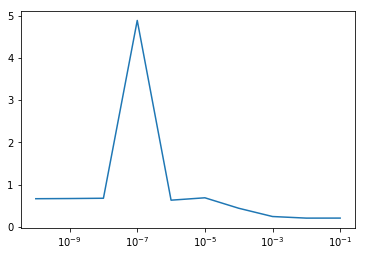

In [31]:
import time               # import time
tol = 0.1                 # initial tolerance
tols = []                 # container for tolerances
times = []                # container for times
for i in range(10):       # loop through iterations
    svm_clf = SVC(kernel="poly", gamma=3, C=10, tol=tol,verbose=1) # define classifier, set tolerance, print "verbose"
    t1 = time.time()      # measure time
    svm_clf.fit(X, y)     # train the model
    t2 = time.time()      # measure time
    times.append(t2-t1)   # store training time in container
    tols.append(tol)      # store tolerance in container
    print(i, tol, t2-t1)  # print loop, tolerance, and training time
    tol /= 10             # reduce tolerance by 10
plt.semilogx(tols, times) # plot training times (y-axis) w.r.t. the tolerance (x-axis)

## Linear SVM Classifier Implementation Using Batch Gradient Descent
Let' see if we can do this. (With the help of Github, it shouldn't be a problem.)

In [32]:
# use the entire dataset for training
X = iris["data"][:, (2, 3)]                                 # petal length, petal width
y = (iris["target"] == 2).astype(np.float64).reshape(-1, 1) # Iris-Virginica
# build SVM classifier using the BaseEstimator class
from sklearn.base import BaseEstimator          # import BaseEstimator
class MyLinearSVC(BaseEstimator):
    def __init__(self, C=1, eta0=1, eta_d=10000, n_epochs=1000, random_state=None):
        # hyperparameter initialization
        self.C = C
        self.eta0 = eta0
        self.n_epochs = n_epochs
        self.random_state = random_state
        self.eta_d = eta_d
    def eta(self, epoch):
        return self.eta0 / (epoch + self.eta_d) # decrease eta (width of street) with increasing epoch
    def fit(self, X, y):
        # random initialization
        if self.random_state:
            np.random.seed(self.random_state)
        w = np.random.randn(X.shape[1], 1)      # n random feature weights between 0 and 1
        b = 0                                   # start with zero offset vector
        m = len(X)                              # number of instances
        t = y * 2 - 1                           # -1 if t==0, +1 if t==1 (corresponds to class of this instance)
        X_t = X * t                             # class-conditional flipped  features for all instances
        self.Js=[]                              # container for consecutive cost functions
        # training on the entire batch
        for epoch in range(self.n_epochs):      # loop through epochs
            support_vectors_idx = (X_t.dot(w) + t *b < 1).ravel() # those instances that lie on the street are the ...
                                                                  # ... "support vectors" (mulitply both sides by t)
            X_t_sv = X_t[support_vectors_idx]   # use the just created list to take the support vectors ...
            t_sv = t[support_vectors_idx]       # and their "class sign" (±1)
            # SVM cost function
            J = 1/2 * np.sum(w * w) + self.C * (np.sum(1 - X_t_sv.dot(w)) - b * np.sum(t_sv)) # current cost function
            self.Js.append(J)                   # include it in the container Js
            # split the gradient into two parts
            w_gradient_vector = w - self.C * np.sum(X_t_sv, axis=0).reshape(-1, 1) # first part
            b_derivative = -C * np.sum(t_sv)    # second part
            # also split the step into two parts
            w = w - self.eta(epoch) * w_gradient_vector # first part
            b = b - self.eta(epoch) * b_derivative      # second part
        self.intercept_ = np.array([b])         # offset vector -> BaseEstimator
        self.coef_ = np.array([w])              # weigths -> BaseEstimator
        support_vectors_idx = (X_t.dot(w) + t * b < 1).ravel() # support vector indices of readily trained model
        self.support_vectors_ = X[support_vectors_idx]         # support vectors of readily trained model
        return self                             # the fitting method shall return all the parameters of BaseEstimator
    def decision_function(self, X):             # the sign of this determines the class of each instance
        return X.dot(self.coef_[0]) + self.intercept_[0]
    def predict(self, X):                       # turn the sign into 0 (negative sign) or 1 (positive sign)
        return (self.decision_function(X) >= 0).astype(np.float64)
# now execute the above on two instances
C=2                                             # hyperparameter C
svm_clf = MyLinearSVC(C=C, eta0 = 10, eta_d = 1000, n_epochs=60000, random_state=2) # specific algorithm
svm_clf.fit(X, y)                               # do the fitting for this algorithm
svm_clf.predict(np.array([[5, 2], [4, 1]]))     # and make predictions

array([[1.],
       [0.]])

The alogirthm works! Now, let's see how the cost function goes down over the epochs.

[0, 60000, 0, 100]

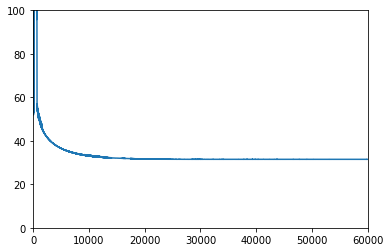

In [33]:
# plot the cost function vs. the current epoch
plt.plot(range(svm_clf.n_epochs), svm_clf.Js)
plt.axis([0, svm_clf.n_epochs, 0, 100])

Comparing our model to a production ready model from Scikit-Learn sounds like a good idea.

In [34]:
# own model
print(svm_clf.intercept_, svm_clf.coef_)
# linear SVC model from Scikit-Learn
svm_clf2 = SVC(kernel="linear", C=C)
svm_clf2.fit(X, y.ravel())
print(svm_clf2.intercept_, svm_clf2.coef_)

[-15.56761653] [[[2.28120287]
  [2.71621742]]]
[-15.51721253] [[2.27128546 2.71287145]]


The results above and the plots below show that the two algorithms make almost identical predictions.

[4, 6, 0.8, 2.8]

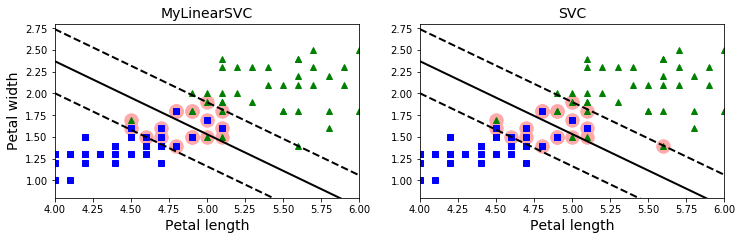

In [35]:
# function that plots the street (decision boundary as well as upper and lower edges)
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    # there are two features and therefore also two weights, w0 and w1 as well as a bias term
    # at the decision boundary, w0*x0 + w1*x1 + b = 0, or equivalently, x1 = -(w0*x0+b)/w1; this is what we plot
    x0 = np.linspace(xmin, xmax, 200)            # x-axis
    decision_boundary = -w[0]/w[1] * x0 - b/w[1] # y-axis as function of x-axis
    margin = 1/w[1]                              # the offset along the y-direction is 1/w1
    gutter_up = decision_boundary + margin       # upper edge of street
    gutter_down = decision_boundary - margin     # lower edge of street
    svs = svm_clf.support_vectors_               # exploiting our method defined above to get the support vectors
    # plotting instructions
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)
# do the plotting
yr = y.ravel()
plt.figure(figsize=(12,3.2))
# first subplot
plt.subplot(121)
plt.plot(X[:, 0][yr==1], X[:, 1][yr==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][yr==0], X[:, 1][yr==0], "bs", label="Not Iris-Virginica")
plot_svc_decision_boundary(svm_clf, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.title("MyLinearSVC", fontsize=14)
plt.axis([4, 6, 0.8, 2.8])
# second subplot
plt.subplot(122)
plt.plot(X[:, 0][yr==1], X[:, 1][yr==1], "g^")
plt.plot(X[:, 0][yr==0], X[:, 1][yr==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.title("SVC", fontsize=14)
plt.axis([4, 6, 0.8, 2.8])

Below, the linear stochastic gradient descent classification algorithm "SGDClassifier" from Scikit-Learn yields similar but clearly distinguishable results.

[-12.52988101   1.94162342   1.84544824]


[4, 6, 0.8, 2.8]

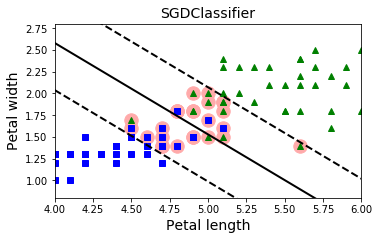

In [36]:
from sklearn.linear_model import SGDClassifier   # import
sgd_clf = SGDClassifier(loss="hinge", alpha = 0.017, max_iter = 50, random_state=42) # set algorithm
sgd_clf.fit(X, y.ravel())                        # train algorithm
m = len(X)                                       # number of instances
t = y * 2 - 1                                    # turn the predicted 0 class to -1 and ...
                                                 # ... keep the predicted 1 class as +1 (as above)
X_b = np.c_[np.ones((m, 1)), X]                  # inclued a constant (1) feature for the bias term
X_b_t = X_b * t                                  # flip the features' signs, depending on the predicted class 
sgd_theta = np.r_[sgd_clf.intercept_[0], sgd_clf.coef_[0]] # bias, w0, w1
print(sgd_theta)
support_vectors_idx = (X_b_t.dot(sgd_theta) < 1).ravel() # find support vector indices
sgd_clf.support_vectors_ = X[support_vectors_idx] # find support vectors
sgd_clf.C = C                                     # we have not specified C yet, so we do it here
# plotting
plt.figure(figsize=(5.5,3.2))
plt.plot(X[:, 0][yr==1], X[:, 1][yr==1], "g^")
plt.plot(X[:, 0][yr==0], X[:, 1][yr==0], "bs")
plot_svc_decision_boundary(sgd_clf, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.title("SGDClassifier", fontsize=14)
plt.axis([4, 6, 0.8, 2.8])

## Exercises
page 165
### 1.-7.
Solutions are shown in Appendix A of the book and in the separate notebook *ExercisesWithoutCode*.
### 8.
Train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClassifier on the same dataset. See if you can get them to produce roughly the same model.<br>
We use the iris dataset. As shown in the last plot of the self-coded notebook "4. Training Models", Iris Setosa and Iris Versicolor are linearly separable.

In [37]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [38]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
C = 5
alpha = 1 / (C * len(X))
lin_clf = LinearSVC(loss="hinge", C=C, random_state=42)
svm_clf = SVC(kernel="linear", C=C)
sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=alpha,
                        max_iter=100000, random_state=42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
lin_clf.fit(X_scaled, y)
svm_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)
print("LinearSVC:                   ", lin_clf.intercept_, lin_clf.coef_)
print("SVC:                         ", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier(alpha={:.5f}):".format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)

LinearSVC:                    [0.28474272] [[1.05364736 1.09903308]]
SVC:                          [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier(alpha=0.00200): [0.117] [[0.77714169 0.72981762]]


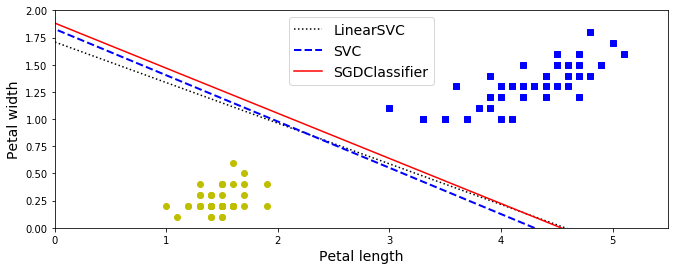

In [39]:
# compute the slope and bias of each decision boundary
w1 = -lin_clf.coef_[0, 0]/lin_clf.coef_[0, 1]
b1 = -lin_clf.intercept_[0]/lin_clf.coef_[0, 1]
w2 = -svm_clf.coef_[0, 0]/svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0]/svm_clf.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]
# transform the decision boundary lines back to the original scale
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])
# plot all three decision boundaries
plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris-Versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris-Setosa"
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.show()

### 9.
Train an SVM classifier on the MNIST dataset. Since SVM classifiers are binary classifiers, you will need to use one-versus-all to classify all 10 digts. You may want to tune the hyperparameters using small validation sets to speed up the process. What accuracy can you reach?

In [41]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X = mnist.data.astype("float32")
y = mnist.target.astype("int64")
X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]
np.random.seed(42)
rnd_idx = np.random.permutation(60000)
X_train = X_train[rnd_idx]
y_train = y_train[rnd_idx]
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train, y_train)

/home/matthias/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0)

In [42]:
from sklearn.metrics import accuracy_score
y_pred = lin_clf.predict(X_train)
accuracy_score(y_train, y_pred)

0.8946

In [43]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train_scaled, y_train)

/home/matthias/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0)

In [44]:
y_pred = lin_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9215166666666667

In [45]:
svm_clf = SVC(decision_function_shape="ovr")
svm_clf.fit(X_train_scaled[:10000], y_train[:10000])

/home/matthias/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [46]:
y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9476

In [47]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2)
rnd_search_cv.fit(X_train_scaled[:1000], y_train[:1000])

/home/matthias/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=8.852316058423087, gamma=0.001766074650481071 .................
[CV] .. C=8.852316058423087, gamma=0.001766074650481071, total=   0.8s
[CV] C=8.852316058423087, gamma=0.001766074650481071 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] .. C=8.852316058423087, gamma=0.001766074650481071, total=   0.9s
[CV] C=8.852316058423087, gamma=0.001766074650481071 .................
[CV] .. C=8.852316058423087, gamma=0.001766074650481071, total=   0.8s
[CV] C=1.8271960104746645, gamma=0.006364737055453384 ................
[CV] . C=1.8271960104746645, gamma=0.006364737055453384, total=   0.9s
[CV] C=1.8271960104746645, gamma=0.006364737055453384 ................
[CV] . C=1.8271960104746645, gamma=0.006364737055453384, total=   0.9s
[CV] C=1.8271960104746645, gamma=0.006364737055453384 ................
[CV] . C=1.8271960104746645, gamma=0.006364737055453384, total=   0.9s
[CV] C=9.875199193765326, gamma=0.051349833451870636 .................
[CV] .. C=9.875199193765326, gamma=0.051349833451870636, total=   0.9s
[CV] C=9.875199193765326, gamma=0.051349833451870636 .................
[CV] .. C=9.875199193765326, gamma=0.051349833451870636, total=   0.9s
[CV] C=9.875199193765326, gamma=0.051349833451870636 .................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   26.1s finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                 coef0=0.0, decision_function_shape='ovr',
                                 degree=3, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, probability=False,
                                 random_state=None, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f453ce249e8>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f453ce24eb8>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [48]:
rnd_search_cv.best_estimator_

SVC(C=8.852316058423087, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001766074650481071,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [49]:
rnd_search_cv.best_score_

0.864

In [50]:
rnd_search_cv.best_estimator_.fit(X_train_scaled, y_train)

SVC(C=8.852316058423087, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001766074650481071,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [51]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.99965

In [52]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9709

Apparently, the model is overfitting slightly. Still, the accuracy score on the test set is quite good.
### 10.
Train an SVM regressor on the California housing dataset.

In [53]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
X = housing["data"]
y = housing["target"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
from sklearn.svm import LinearSVR
lin_svr = LinearSVR(random_state=42)
lin_svr.fit(X_train_scaled, y_train)

/home/matthias/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=42, tol=0.0001, verbose=0)

In [54]:
from sklearn.metrics import mean_squared_error
y_pred = lin_svr.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
mse

0.9499688222172291

In [55]:
import numpy as np
np.sqrt(mse)

0.9746634404845752

In [56]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(SVR(), param_distributions, n_iter=10, verbose=2, random_state=42)
rnd_search_cv.fit(X_train_scaled, y_train)

/home/matthias/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=4.745401188473625, gamma=0.07969454818643928 ..................
[CV] ... C=4.745401188473625, gamma=0.07969454818643928, total=   7.1s
[CV] C=4.745401188473625, gamma=0.07969454818643928 ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.1s remaining:    0.0s


[CV] ... C=4.745401188473625, gamma=0.07969454818643928, total=   7.0s
[CV] C=4.745401188473625, gamma=0.07969454818643928 ..................
[CV] ... C=4.745401188473625, gamma=0.07969454818643928, total=   7.1s
[CV] C=8.31993941811405, gamma=0.015751320499779724 ..................
[CV] ... C=8.31993941811405, gamma=0.015751320499779724, total=   6.6s
[CV] C=8.31993941811405, gamma=0.015751320499779724 ..................
[CV] ... C=8.31993941811405, gamma=0.015751320499779724, total=   6.4s
[CV] C=8.31993941811405, gamma=0.015751320499779724 ..................
[CV] ... C=8.31993941811405, gamma=0.015751320499779724, total=   6.5s
[CV] C=2.560186404424365, gamma=0.002051110418843397 .................
[CV] .. C=2.560186404424365, gamma=0.002051110418843397, total=   5.9s
[CV] C=2.560186404424365, gamma=0.002051110418843397 .................
[CV] .. C=2.560186404424365, gamma=0.002051110418843397, total=   5.9s
[CV] C=2.560186404424365, gamma=0.002051110418843397 .................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  3.1min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, shrinking=True,
                                 tol=0.001, verbose=False),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f453dc8a5c0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f453dc8a048>},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [57]:
rnd_search_cv.best_estimator_

SVR(C=4.745401188473625, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma=0.07969454818643928, kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [58]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
np.sqrt(mse)

0.5727524770785356

This looks much better than the linear model. Let's select this model and evaluate it on the test set!

In [59]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

0.592916838552874